Solultions per second, or more commonly called the hash-rate refers to the speed at which a device is solving complex equations on the selected algorithm. Since the speed at which these equations can be solved may influence the amount of reward earned, lets take a look at the solultions per Second (Sol/s) as a function of Time (Minutes) as well as the mean for each GPU, and all GPU's.

Enter file name: 
   Minutes   GPU0   GPU1   GPU2   GPU3   GPU4   GPU5   GPU6   GPU7   GPU8  \
0      0.5  488.0  513.0  498.0  496.0  465.0  495.0    0.0  451.0    0.0   
1      1.0  478.0  506.0  489.0  498.0  448.0  482.0  489.0  451.0  508.0   
2      1.5  479.0  508.0  494.0  491.0  447.0  481.0  483.0  441.0  504.0   
3      2.0  473.0  496.0  492.0  489.0  450.0  474.0  489.0  445.0  505.0   
4      2.5  464.0  506.0  500.0  492.0  449.0  471.0  480.0  451.0  504.0   

    GPU9  GPU10  GPU11  GPU12  Total Sol/s  
0  507.0    0.0    0.0    0.0       3913.0  
1  505.0    0.0  494.0  487.0       5835.0  
2  502.0  496.0  491.0  491.0       6308.0  
3  496.0  492.0  490.0  486.0       6277.0  
4  493.0  491.0  493.0  487.0       6281.0  


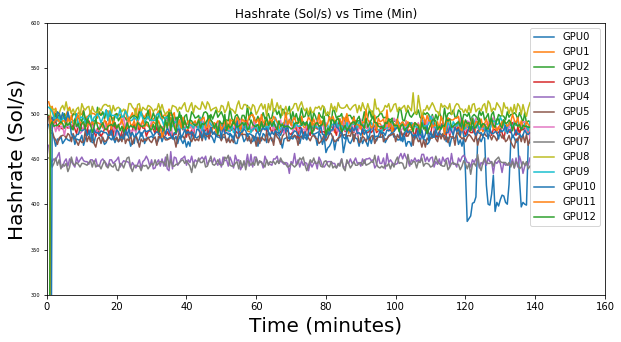

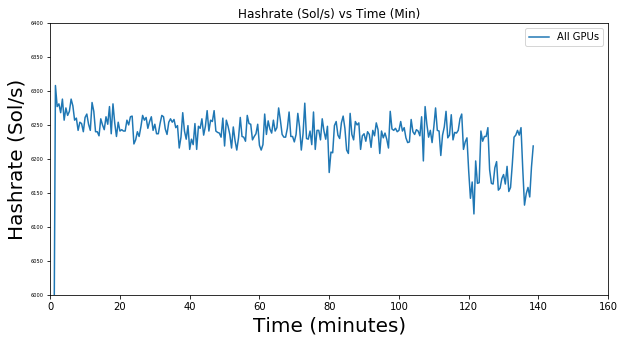

              Mean Sol/s
GPU0          465.971119
GPU1          489.158845
GPU2          496.841155
GPU3          482.472924
GPU4          446.703971
GPU5          473.216606
GPU6          484.277978
GPU7          444.530686
GPU8          504.007220
GPU9          488.895307
GPU10         476.212996
GPU11         488.245487
GPU12         485.851986
Total Sol/s  6226.386282


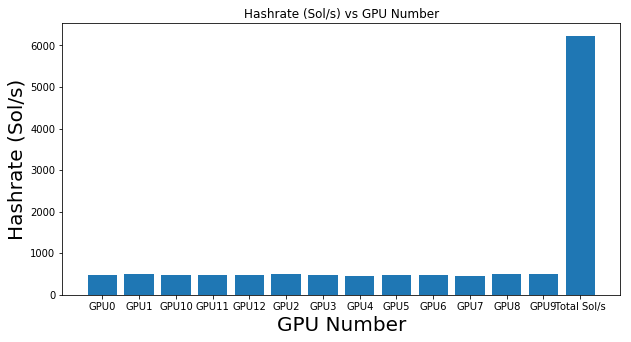

          Mean Sol/s
All GPUs  478.952791
GPU0      465.971119
GPU1      489.158845
GPU10     476.212996
GPU11     488.245487
GPU12     485.851986
GPU2      496.841155
GPU3      482.472924
GPU4      446.703971
GPU5      473.216606
GPU6      484.277978
GPU7      444.530686
GPU8      504.007220
GPU9      488.895307


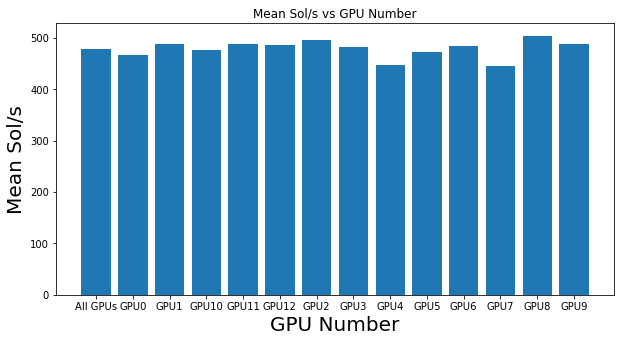

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

#Prompt user for file input, catch with a default if statement

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'ewbf.log'
fh = open(fname)
    
    
# Open file and use a for loop to split each line and isolate lines that start with desired text
# using the startswith function and continue statement

# Create an empty dictionary and fill with indices 0-12 for each gpu, values are sliced from each returned line from the for loop
# Create empty list to contain appended keys and values from the dictionaryfh = open(fname)

gpu = dict()
lst = list()

for lines in fh:
    
    x = lines.split(' ')
    if not lines.startswith('GPU0: '): continue
        
    gpu[0] = x[0:2]
    gpu[1] = x[3:5]
    gpu[2] = x[6:8]
    gpu[3] = x[9:11]
    gpu[4] = x[12:14]
    gpu[5] = x[15:17]
    gpu[6] = x[18:20]
    gpu[7] = x[21:23]
    gpu[8] = x[24:26]
    gpu[9] = x[27:29]
    gpu[10] = x[30:32]
    gpu[11] = x[33:35]
    gpu[12] = x[36:38]
        
    #print(gpu)
    
#For each key in the dictionary, add the key-value pair (tuple) to the list
    for key in gpu:
        value = gpu[key]
        lst.append(value)
        
#print(lst)

# A dataframe from the using the keys and values appended to the list is creating using pandas

df = pd.DataFrame(lst)
df.columns = ['GPU Number', 'Sol/s']
df.tail()

# Isolate the data for each gpu by using the builtin .loc indexing function 
# to locate GPU0: from the dataframe
# create a new dataframe

df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.head()

# The index is reset so that a function for minutes can be set based on the index

df_gpu0_sols.reset_index(inplace=True)
del df_gpu0_sols['index']
df_gpu0_sols.head()


# Data has been reported every 30 seconds, from the original index values from df a for loop is used to iterate 
# over each value and set time variables that are appended to a list.
# create dataframe from list using pandas

rows = df_gpu0_sols.index.values
lst = list()

for time in rows:
    secs = (30 + (time * 30))  
    minutes = secs / 60
    hrs = minutes / 60
    #print(minutes)
    lst.append(minutes)
#print(lst)
columns = ['Minutes']    
df_minutes = pd.DataFrame(lst, columns = columns)
df_minutes.head()

# Create new dataframe for gpu0 by concatenating dataframes using pandas built in .concat function
# Drop NaN values from dataframe
df_gpu0_sols = pd.concat([df_minutes, df_gpu0_sols], axis = 1)
df_gpu0_sols = df_gpu0_sols.dropna()
df_gpu0_sols.head()


# # Matplotlib is used to plot data from selected dataframe columns
# plt.rcParams["figure.figsize"] = [16,9]
# plt.bar(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], align='center', alpha=1.0, label='GPU0')
# plt.title('Hashrate (Sol/s) vs Time (Min)')
# plt.xlabel('Time (minutes)', size = 20)
# plt.ylabel('Hashrate (Sol/s)', size = 20)
# plt.legend()
# plt.show()

# #ax = plt.subplots()
# #ax.yticks(np.arange(380, 480, 500))
# #plt.ylim(ymin=0)
# #plt.yticks(fontsize=5)

# plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'])
# plt.title('Hashrate (Sol/s) vs Time (Min)')
# plt.xlabel('Time (minutes)', size = 20)
# plt.ylabel('Hashrate (Sol/s)', size = 20)
# plt.yticks(fontsize=10)
# plt.figure(figsize=(10,8), dpi=800)
# plt.show()


# Repeat for each additional gpu, creating a dataframe for each
# Multiple datasets can be plotted on one graphat for each additional gpu, creating a dataframe for each

df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.reset_index(inplace=True)
del df_gpu0_sols['index']
df_gpu0_sols.columns = ['GPU Number', 'Sol/s']
df_gpu0_sols = pd.concat([df_minutes, df_gpu0_sols], axis = 1)
df_gpu0_sols = df_gpu0_sols.dropna()

df_gpu1_sols = df.loc[df['GPU Number'] == 'GPU1:']
df_gpu1_sols.reset_index(inplace=True)
del df_gpu1_sols['index']
df_gpu1_sols.columns = ['GPU Number', 'Sol/s']
df_gpu1_sols = pd.concat([df_minutes, df_gpu1_sols], axis = 1)
df_gpu1_sols = df_gpu1_sols.dropna()

df_gpu2_sols = df.loc[df['GPU Number'] == 'GPU2:']
df_gpu2_sols.reset_index(inplace=True)
del df_gpu2_sols['index']
df_gpu2_sols.columns = ['GPU Number', 'Sol/s']
df_gpu2_sols = pd.concat([df_minutes, df_gpu2_sols], axis = 1)
df_gpu2_sols = df_gpu2_sols.dropna()

df_gpu3_sols = df.loc[df['GPU Number'] == 'GPU3:']
df_gpu3_sols.reset_index(inplace=True)
del df_gpu3_sols['index']
df_gpu3_sols.columns = ['GPU Number', 'Sol/s']
df_gpu3_sols = pd.concat([df_minutes, df_gpu3_sols], axis = 1)
df_gpu3_sols = df_gpu3_sols.dropna()


df_gpu4_sols = df.loc[df['GPU Number'] == 'GPU4:']
df_gpu4_sols.reset_index(inplace=True)
del df_gpu4_sols['index']
df_gpu4_sols.columns = ['GPU Number', 'Sol/s']
df_gpu4_sols = pd.concat([df_gpu4_sols, df_minutes], axis = 1)
df_gpu4_sols = df_gpu4_sols.dropna(axis = 0)


df_gpu5_sols = df.loc[df['GPU Number'] == 'GPU5:']
df_gpu5_sols.reset_index(inplace=True)
del df_gpu5_sols['index']
df_gpu5_sols.columns = ['GPU Number', 'Sol/s']
df_gpu5_sols = pd.concat([df_gpu5_sols, df_minutes], axis = 1)
df_gpu5_sols = df_gpu5_sols.dropna(axis = 0)


df_gpu6_sols = df.loc[df['GPU Number'] == 'GPU6:']
df_gpu6_sols.reset_index(inplace=True)
del df_gpu6_sols['index']
df_gpu6_sols.columns = ['GPU Number', 'Sol/s']
df_gpu6_sols = pd.concat([df_gpu6_sols, df_minutes], axis = 1)
df_gpu6_sols = df_gpu6_sols.dropna(axis = 0)


df_gpu7_sols = df.loc[df['GPU Number'] == 'GPU7:']
df_gpu7_sols.reset_index(inplace=True)
del df_gpu7_sols['index']
df_gpu7_sols.columns = ['GPU Number', 'Sol/s']
df_gpu7_sols = pd.concat([df_gpu7_sols, df_minutes], axis = 1)
df_gpu7_sols = df_gpu7_sols.dropna(axis = 0)


df_gpu8_sols = df.loc[df['GPU Number'] == 'GPU8:']
df_gpu8_sols.reset_index(inplace=True)
del df_gpu8_sols['index']
df_gpu8_sols.columns = ['GPU Number', 'Sol/s']
df_gpu8_sols = pd.concat([df_gpu8_sols, df_minutes], axis = 1)
df_gpu8_sols = df_gpu8_sols.dropna(axis = 0)


df_gpu9_sols = df.loc[df['GPU Number'] == 'GPU9:']
df_gpu9_sols.reset_index(inplace=True)
del df_gpu9_sols['index']
df_gpu9_sols.columns = ['GPU Number', 'Sol/s']
df_gpu9_sols = pd.concat([df_gpu9_sols, df_minutes], axis = 1)
df_gpu9_sols = df_gpu9_sols.dropna(axis = 0)


df_gpu10_sols = df.loc[df['GPU Number'] == 'GPU10:']
df_gpu10_sols.reset_index(inplace=True)
del df_gpu10_sols['index']
df_gpu10_sols.columns = ['GPU Number', 'Sol/s']
df_gpu10_sols = pd.concat([df_gpu10_sols, df_minutes], axis = 1)
df_gpu10_sols = df_gpu10_sols.dropna(axis = 0)


df_gpu11_sols = df.loc[df['GPU Number'] == 'GPU11:']
df_gpu11_sols.reset_index(inplace=True)
del df_gpu11_sols['index']
df_gpu11_sols.columns = ['GPU Number', 'Sol/s']
df_gpu11_sols = pd.concat([df_gpu11_sols, df_minutes], axis = 1)
df_gpu11_sols = df_gpu11_sols.dropna(axis = 0)


df_gpu12_sols = df.loc[df['GPU Number'] == 'GPU12:']
df_gpu12_sols.reset_index(inplace=True)
del df_gpu12_sols['index']
df_gpu12_sols.columns = ['GPU Number', 'Sol/s']
df_gpu12_sols = pd.concat([df_gpu12_sols, df_minutes], axis = 1)
df_gpu12_sols = df_gpu12_sols.dropna(axis = 0)

# plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0', color = 'b')
# plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1', color = 'g')
# plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
# plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')
# plt.title('Hashrate (Sol/s) vs Time (Min)')
# plt.xlabel('Time (minutes)', size = 20)
# plt.ylabel('Hashrate (Sol/s)', size = 20)
# plt.yticks(fontsize=5)
# #plt.figure(figsize=(200,100))
# plt.legend()
# plt.show()

# plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0')
# plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1')
# plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
# plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')
# plt.plot(df_gpu4_sols['Minutes'], df_gpu4_sols['Sol/s'], label = 'GPU4')
# plt.plot(df_gpu5_sols['Minutes'], df_gpu5_sols['Sol/s'], label = 'GPU5')
# plt.plot(df_gpu6_sols['Minutes'], df_gpu6_sols['Sol/s'], label = 'GPU6')
# plt.plot(df_gpu7_sols['Minutes'], df_gpu7_sols['Sol/s'], label = 'GPU7')
# plt.plot(df_gpu8_sols['Minutes'], df_gpu8_sols['Sol/s'], label = 'GPU8')
# plt.plot(df_gpu9_sols['Minutes'], df_gpu9_sols['Sol/s'], label = 'GPU9')
# plt.plot(df_gpu10_sols['Minutes'], df_gpu10_sols['Sol/s'], label = 'GPU10')
# plt.plot(df_gpu11_sols['Minutes'], df_gpu11_sols['Sol/s'], label = 'GPU11')
# plt.plot(df_gpu12_sols['Minutes'], df_gpu12_sols['Sol/s'], label = 'GPU12')
# plt.title('Hashrate (Sol/s) vs Time (Min)')
# plt.xlabel('Time (minutes)', size = 20)
# plt.ylabel('Hashrate (Sol/s)', size = 20)
# plt.yticks(fontsize=6)
# #plt.xlim(0, )
# #plt.ylim(0, )
# #plt.figure(figsize=(200,100))
# plt.rcParams["figure.figsize"] = [16,9]
# plt.legend()
# plt.show()


# The same result can be produced from creating a new dataframe made 
# from values taken from each devices previous dataframe using the pandas concat function.

gpu0_sols = list()
gpu0_sols = df_gpu0_sols['Sol/s'].values
df0 = pd.DataFrame(gpu0_sols)
df0.columns = ['GPU0']

gpu1_sols = df_gpu1_sols['Sol/s'].values
df1 = pd.DataFrame(gpu1_sols)
df1.columns = ['GPU1']

gpu2_sols = df_gpu2_sols['Sol/s'].values
df2 = pd.DataFrame(gpu2_sols)
df2.columns = ['GPU2']

gpu3_sols = df_gpu3_sols['Sol/s'].values
df3 = pd.DataFrame(gpu3_sols)
df3.columns = ['GPU3']

gpu4_sols = df_gpu4_sols['Sol/s'].values
df4 = pd.DataFrame(gpu4_sols)
df4.columns = ['GPU4']

gpu5_sols = df_gpu5_sols['Sol/s'].values
df5 = pd.DataFrame(gpu5_sols)
df5.columns = ['GPU5']

gpu6_sols = df_gpu6_sols['Sol/s'].values
df6 = pd.DataFrame(gpu6_sols)
df6.columns = ['GPU6']

gpu7_sols = df_gpu7_sols['Sol/s'].values
df7 = pd.DataFrame(gpu7_sols)
df7.columns = ['GPU7']

gpu8_sols = df_gpu8_sols['Sol/s'].values
df8 = pd.DataFrame(gpu8_sols)
df8.columns = ['GPU8']

gpu9_sols = df_gpu9_sols['Sol/s'].values
df9 = pd.DataFrame(gpu9_sols)
df9.columns = ['GPU9']

gpu10_sols = df_gpu10_sols['Sol/s'].values
df10 = pd.DataFrame(gpu10_sols)
df10.columns = ['GPU10']

gpu11_sols = df_gpu11_sols['Sol/s'].values
df11 = pd.DataFrame(gpu11_sols)
df11.columns = ['GPU11']

gpu12_sols = df_gpu12_sols['Sol/s'].values
df12 = pd.DataFrame(gpu12_sols)
df12.columns = ['GPU12']

df_all_sols = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 1).astype(float)
df_all_sols.head()


# Create a list containing the sum of all values in each row
# Create df from list
# Concatenate new list to existing df

df_total_sols = df_all_sols.sum(axis = 1).astype(float)

df_total_sols = pd.DataFrame(df_total_sols)
df_total_sols.columns = ['Total Sol/s']
df_total_sols.head()

df_all_sols = pd.concat([df_minutes, df_all_sols, df_total_sols], axis = 1)
print(df_all_sols.head())


# Matplotlib is used to plot all Sol/s for each gpu versus minutes
plt.rcParams["figure.figsize"] = [10,5]
plt.ylim(300, 600 )
plt.xlim(0, 160 )

plt.plot(df_all_sols['Minutes'], df_all_sols['GPU0'], label = 'GPU0')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU1'], label = 'GPU1')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU2'], label = 'GPU2')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU3'], label = 'GPU3')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU4'], label = 'GPU4')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU5'], label = 'GPU5')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU6'], label = 'GPU6')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU7'], label = 'GPU7')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU8'], label = 'GPU8')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU9'], label = 'GPU9')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU10'], label = 'GPU10')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU11'], label = 'GPU11')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU12'], label = 'GPU12')

plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
#plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()


# Matplotlib is used to plot all Sol/s for all GPU's versus minutes
plt.rcParams["figure.figsize"] = [10,5]
plt.xlim(0, 160 )
plt.ylim(6000, 6400 )
plt.plot(df_all_sols['Minutes'], df_all_sols['Total Sol/s'], label = 'All GPUs')
plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
#plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()


# The mean for each GPU
df_mean_sols = pd.DataFrame(df_all_sols.mean()).drop('Minutes')
df_mean_sols.columns = ['Mean Sol/s']
print(df_mean_sols)

plt.rcParams["figure.figsize"] = [10,5]
plt.bar(df_mean_sols.index.values, df_mean_sols['Mean Sol/s'], align='center', alpha=1.0)
plt.title('Hashrate (Sol/s) vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.xticks(df_mean_sols.index.values)
plt.legend()
plt.show()


# The mean of all devices 

mean_all_sols = df_mean_sols.drop('Total Sol/s')
mean_all_sols = mean_all_sols.mean()
#meansols.astype(float)
#meansols = meansols.values
mean_all_sols = pd.DataFrame(mean_all_sols)
mean_all_sols.columns = ['Mean Sol/s']
mean_all_sols = mean_all_sols.rename({'Mean Sol/s': 'All GPUs'})
df_mean_sols = df_mean_sols.append(mean_all_sols).drop('Total Sol/s')
df_mean_sols = df_mean_sols.sort_index()
print(df_mean_sols)

plt.rcParams["figure.figsize"] = [10,5]
plt.bar(df_mean_sols.index.values, df_mean_sols['Mean Sol/s'], align='center', alpha=1.0)
plt.title('Mean Sol/s vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Mean Sol/s', size = 20)
#plt.xticks(df_mean_sols.index.values)
plt.legend()
plt.show()